In [49]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.20f}'.format
from scipy.optimize import fsolve
import math
import sympy as sym
from scipy.optimize import newton, bisect, root_scalar, fixed_point

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Soleil Dayana Niño Murcia
*Métodos computacionales 2024-II*

---

#1. Función del área de un segmento circular.
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

El área de un segmento circular se define como:


\begin{equation}
A_s = \frac{r^{2} \cdot (\theta - sen(\theta))}{2}
\end{equation}

El área de un cuarto de circunferencia es:

\begin{equation}
A_c = \frac{\pi ⋅ r^{2}}{4}
\end{equation}

Entonces, igualando ambas áreas y luego de simplificar, se obtiene la ecuación:
\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


In [21]:
f = lambda x: x-np.sin(x)-np.pi/2

In [22]:
theta_vals = np.linspace(0, 4*np.pi, 100)
f_vals = f(theta_vals)
df = pd.DataFrame({'theta': theta_vals, 'f(theta)': f_vals}) # DataFrame con valores

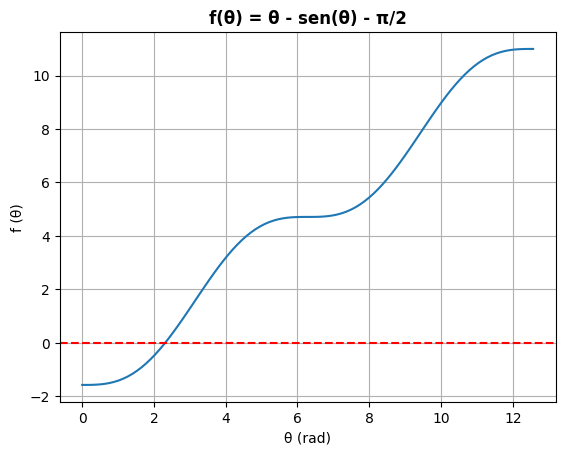

In [23]:
plt.plot(df['theta'], df['f(theta)'])
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.xlabel('θ (rad)')
plt.ylabel('f (θ)')
plt.title('f(θ) = θ - sen(θ) - π/2', fontweight = 'bold')
plt.grid(True)
plt.show()

In [48]:
sol_aprox = df[df['f(theta)'].abs() == df['f(theta)'].abs().min()]['theta'].values[0]
print(f"A partir de la gráfica se estima un valor θ alrededor de {sol_aprox:.2f} radianes.")

A partir de la gráfica se estima un valor θ alrededor de 2.28 radianes


In [35]:
# Emplear método Bisección, para comprobar la solución estimada en el apartado anterior:
theta = sym.symbols('theta')
f = theta - sym.sin(theta) - sym.pi/2 # Convirtiendo numérico a simbólico
fl = sym.lambdify(theta, f)

In [36]:
Bisect_Method = bisect(fl, 0, 4*np.pi)
print(f'Valor mediante Bisección: θ ~ {Bisect_Method} radianes') # Cercano al obtenido previamente

Valor mediante Bisección: θ ~ 2.3098814600101703 radianes


In [37]:
# Por punto fijo:
def g(theta):
  return np.sin(theta) + np.pi/2
g = sym.pi/2 + sym.sin(theta)
g = sym.lambdify(theta, g)
pto_fijo = float(fixed_point(g, 2))

# Por Newton
newt = newton(fl, 1)

# Secante
secante = newton(fl, 1, fprime = None)

In [51]:
final_values = {
    'Método': ['Bisección', 'Punto fijo', 'Newton-Raphson', 'Secante'],
    'Solución': [Bisect_Method, pto_fijo, newt, secante]
}

df_raices = pd.DataFrame(final_values)
df_raices

,Método,Solución
0,Bisección,2.30988146001017025100
1,Punto fijo,2.30988146001005745234
2,Newton-Raphson,2.30988146001005745234
3,Secante,2.30988146001005745234


# 2. Cometa Halley

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


In [65]:
e = 0.9672671
T = 75.96000 # Años
t0 = 1986.1113 # Años
t_abr_1 = 1986 + (30 * 2 + 28 + 1)/365 # Años
delta_t = T/100

M = lambda t: 2* np.pi*(t - t0)/T

def anomalia_excentrica(E, M):
  return E - e* np.sin(E) - M

In [66]:
M_april_1 = M(t_abr_1)

values = np.linspace(0, 1, 500)
E_val = anomalia_excentrica(values, M_april_1)

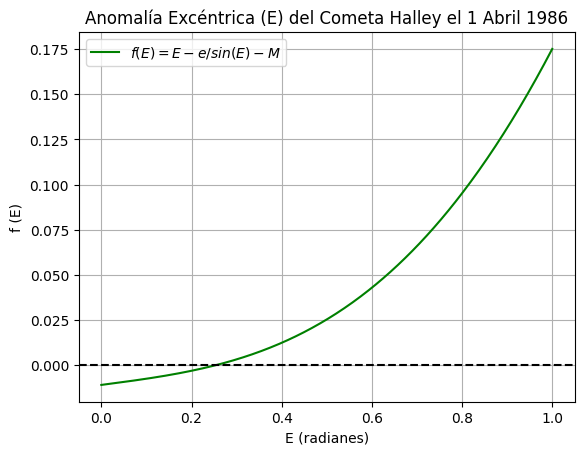

In [67]:
plt.plot(values, E_val, label=r'$f(E) = E - e/sin(E) - M$', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Anomalía Excéntrica (E) del Cometa Halley el 1 Abril 1986')
plt.xlabel('E (radianes)')
plt.ylabel('f (E)')
plt.grid(True)
plt.legend()
plt.show()

Text(0, 0.5, 'E')

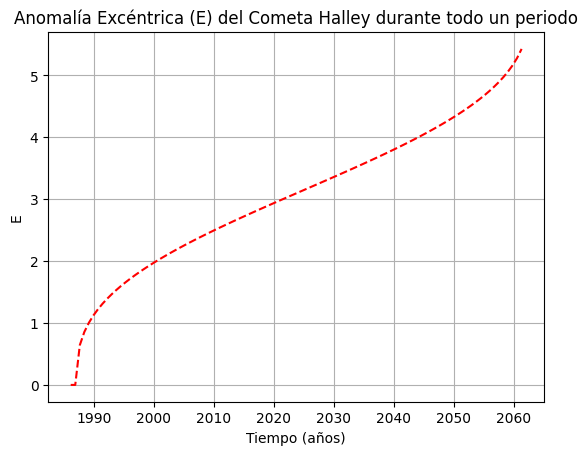

In [73]:
# E=E(t)  para todo un periodo de revolución por Newton y Secante
# con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$
t, dt = np.zeros(100), T/100
for i in range (100):
  t[i] = t0 + i*dt

y = np.zeros(100)
E = sym.symbols('E')

for i in range(1,len(t)-1):
  m = 2*sym.pi*(t[i]-t0)/T
  f = E-e*sym.sin(E)-m
  funct = sym.lambdify(E, f)
  y[i+1] = newton(funct,0.1)

plt.plot(t,y,'r--')
plt.grid()
plt.title('Anomalía Excéntrica (E) del Cometa Halley durante todo un periodo')
plt.xlabel('Tiempo (años)')
plt.ylabel('E')

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [97]:
# Magnetizacion reducida mediante Secante y Newton-Raphson

T = 0.5 # Temperatura

m = sym.symbols('m') # Magnetización
f = m - sym.tanh(m/T) # Función
fprime = sym.diff(f, m) # Derivada de la función
# Convirtiendo a tipo lambda
f = sym.lambdify(m, f)
df = sym.lambdify(m, fprime)

In [104]:
from scipy.optimize import newton
newt = newton(f, 1,fprime= df)
secante = newton(f, 1)

print('Valores obtenidos para la magnetización reducida (m) según método:')
print(f'Secante ---> m = {round(secante,4)}')
print(f'Newton-Raphson ---> m = {round(newt,4)}')

Valores obtenidos para la magnetización reducida (m) según método:
Secante ---> m = 0.9575
Newton-Raphson ---> m = 0.9575


In [105]:
# Validando mediante Punto Fijo
g = sym.tanh(m/T)
g_lambda = sym.lambdify(m, g)

pf = float(fixed_point(g_lambda,1))

print(f'Punto fijo ---> m = {round(pf,4)}') # Note que el valor coincide perfectamente con los obtenidos previamente

Punto fijo  ---> m = 0.9575


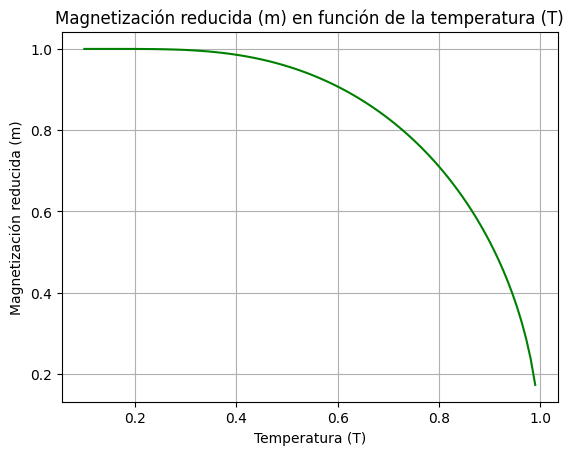

In [112]:
# Aplicar secante para graficar m en función de los 100 valores de T.
T, y = np.linspace(0.1,0.99,100), np.zeros(100)

for i in range(len(T)):
  f = m-sym.tanh(m/T[i])
  f = sym.lambdify(m, f)
  sol = newton(f,1)
  y[i] = sol

plt.plot(T,y, 'g-')
plt.title('Magnetización reducida (m) en función de la temperatura (T)')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización reducida (m)')
plt.grid(True)